<a href="https://colab.research.google.com/github/A-ManiMekhala/Computer_Vision/blob/main/Data_Augmenation_with_Albumentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import os
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import random

In [6]:
def visualize(image):
    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(image)

In [14]:
%cd /content/drive/MyDrive/Datasets

/content/drive/MyDrive/Datasets


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


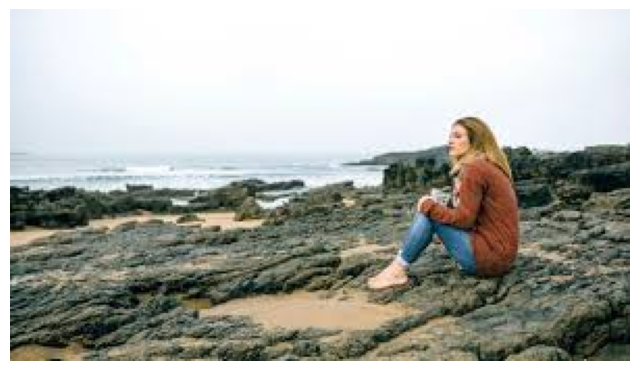

In [15]:
image = cv2.imread('/content/drive/MyDrive/Datasets/sample_images/girl sitting on rock.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

### Few Image transformation with Visualizations

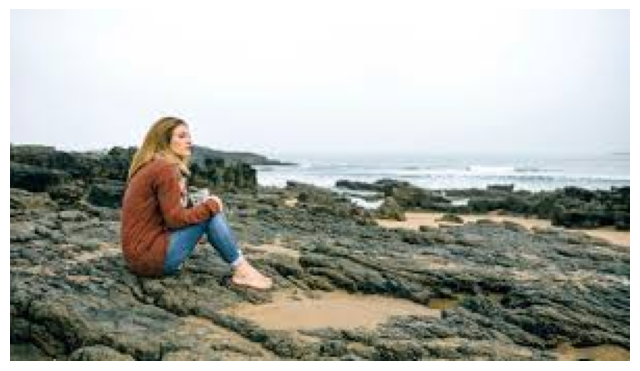

In [19]:
transform = A.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

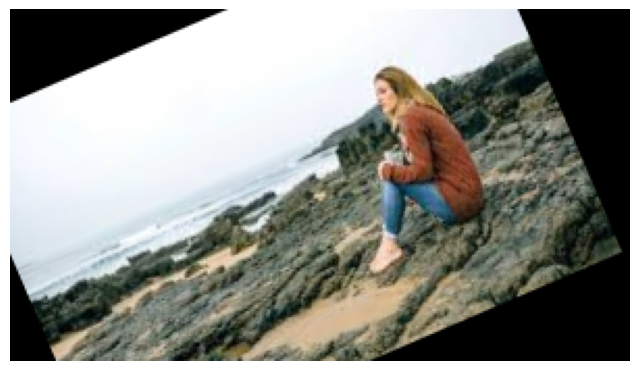

In [24]:
transform = A.ShiftScaleRotate(p=0.5)
random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

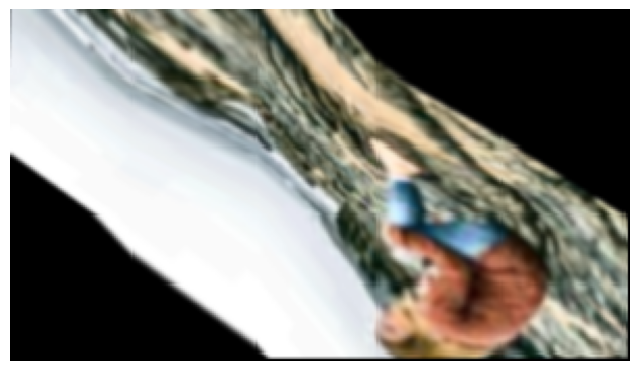

In [26]:
transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue(),
])
random.seed(42)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

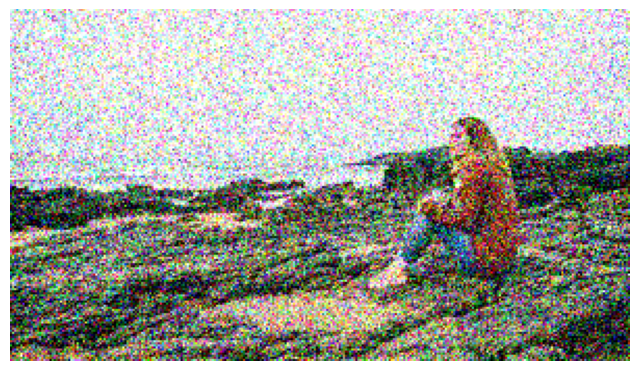

In [27]:
transform = A.Compose([
        A.RandomRotate90(),
        A.HorizontalFlip(),
        A.Transpose(),
        A.GaussNoise(),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.RandomBrightnessContrast(),
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])
random.seed(42)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

### Adding Image Transformations with Albumentations to a dataset

In [28]:
def create_augmentations():
    return A.Compose([
        A.HorizontalFlip(p=0.3),
        A.VerticalFlip(p=0.2),
        A.RandomRotate90(p=0.3),
        A.Transpose(p=0.2),
        A.Blur(blur_limit=3, p=0.3),
        A.ColorJitter(p=0.5),
        ToTensorV2()
    ])

### More Transformations

```
    A.Rotate(limit=45, p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.RandomGamma(p=0.5),
    A.Blur(blur_limit=3, p=0.3),
    A.MotionBlur(blur_limit=3, p=0.3),
    A.GaussianBlur(blur_limit=(3, 5), p=0.3),
    A.GaussNoise(var_limit=(10, 50), p=0.5),
    A.CLAHE(clip_limit=2.0, p=0.5),
    A.ColorJitter(p=0.5),
    A.Sharpen(p=0.3),
    A.HueSaturationValue(p=0.5),
    A.RandomContrast(p=0.5),
    A.RandomBrightness(p=0.5),
    A.ISONoise(p=0.5),
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=0.5),
    A.GridDistortion(num_steps=5, distort_limit=0.3, p=0.5),
    A.OpticalDistortion(distort_limit=0.3, shift_limit=0.3, p=0.5),
    A.PiecewiseAffine(scale=0.03, p=0.5),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
```




In [29]:
def augment_images(input_folder, output_folder, num_augmented_images=10):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    augmenter = create_augmentations()

    for image_file in tqdm(image_files, desc="Processing Images"):
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        base_name = os.path.splitext(image_file)[0]

        for i in range(num_augmented_images):
            augmented = augmenter(image=image)['image']
            augmented = augmented.permute(1, 2, 0).numpy()
            augmented = (augmented * 255).astype(np.uint8)
            output_path = os.path.join(output_folder, f"{base_name}_aug_{i}.jpg")
            cv2.imwrite(output_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

    print(f"Augmented images saved to {output_folder}")

In [30]:
# Example usage
input_folder = "sample_images"  # Folder containing original images
output_folder = "augmented_images1"  # Folder to save augmented images
num_augmentations_per_image = 10  # Number of augmented images per input image

augment_images(input_folder, output_folder, num_augmentations_per_image)

Processing Images: 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]

Augmented images saved to augmented_images1
